<a href="https://colab.research.google.com/github/aktan2803/Com204-mid-term-/blob/main/flowerClass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!jar xvf /content/flowers-recognition.zip

 inflated: flowers/daisy/100080576_f52e8ee070_n.jpg
 inflated: flowers/daisy/10140303196_b88d3d6cec.jpg
 inflated: flowers/daisy/10172379554_b296050f82_n.jpg
 inflated: flowers/daisy/10172567486_2748826a8b.jpg
 inflated: flowers/daisy/10172636503_21bededa75_n.jpg
 inflated: flowers/daisy/102841525_bd6628ae3c.jpg
 inflated: flowers/daisy/10300722094_28fa978807_n.jpg
 inflated: flowers/daisy/1031799732_e7f4008c03.jpg
 inflated: flowers/daisy/10391248763_1d16681106_n.jpg
 inflated: flowers/daisy/10437754174_22ec990b77_m.jpg
 inflated: flowers/daisy/10437770546_8bb6f7bdd3_m.jpg
 inflated: flowers/daisy/10437929963_bc13eebe0c.jpg
 inflated: flowers/daisy/10466290366_cc72e33532.jpg
 inflated: flowers/daisy/10466558316_a7198b87e2.jpg
 inflated: flowers/daisy/10555749515_13a12a026e.jpg
 inflated: flowers/daisy/10555815624_dc211569b0.jpg
 inflated: flowers/daisy/10555826524_423eb8bf71_n.jpg
 inflated: flowers/daisy/10559679065_50d2b16f6d.jpg
 inflated: flowers/daisy/105806915_a9c13e2106_n.jpg
 

In [ ]:
!git clone https://github.com/aktan2803/ml.git
!chmod 777 flowers_sort.sh
!cat flowers_sort.sh
!bash flowers_sort.sh

#!/bin/bash

# download dataset https://www.kaggle.com/alxmamaev/flowers-recognition

#unzip folder 
#jar xvf /Users/$HOME/Downloads/flowers-recognition.zip 
#unzip /Users/$HOME/Downloads/flowers-recognition.zip

#rename folder
#mv /Users/$HOME/Downloads/flowers\ 2 /Users/$HOME/Downloads/flowers2

rm -rf /content/flowers/flowers #it's left folder

##########USERS VAR ###############
path_main_folder="/content/flowers" #NEED CHANGE TO YOU FOLDER
percent_files="20" #NEED CHANGE TO YOUR %
##########USERS VAR ###############


#################################SORT DATA TO FOLDERS######################################################
echo "create folders val"
mkdir $path_main_folder/val
folder_val="$path_main_folder/val"

ls $path_main_folder | grep -v val| while read -r NAME; do

echo " START ###### ${NAME} #####"
count_files_in_folder=$(ls "$path_main_folder"/"${NAME}" | wc -l)
echo " count files in folder ${NAME}  $count_files_in_folder"

echo "count percentage $percent_files folder "${N

In [18]:
from tensorflow import keras
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.layers import BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from numpy import loadtxt
import tensorflow.keras
from PIL import Image, ImageOps
%matplotlib inline

In [19]:
image_size = 256
batch_size = 32

In [20]:
# folders with train dir & val dir
train_dir = '/content/flowers/train/'
test_dir = '/content/flowers/val/'
input_shape = (image_size, image_size, 3)
train_datagen = ImageDataGenerator(rescale=1. / 255,
                              samplewise_center=True,
                              samplewise_std_normalization=True,
                              horizontal_flip = True,
                              vertical_flip = True,
                              height_shift_range= 0.05,
                              width_shift_range=0.2,
                              rotation_range=5,
                              shear_range = 0.1,
                              fill_mode = 'reflect',
                              zoom_range=0.2)

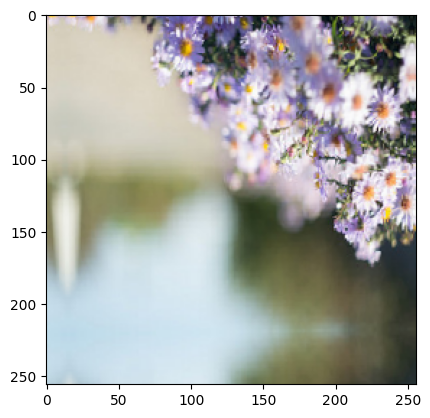

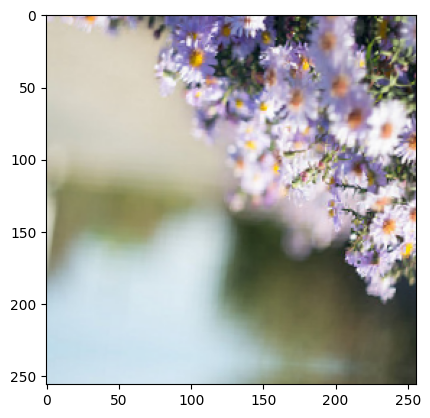

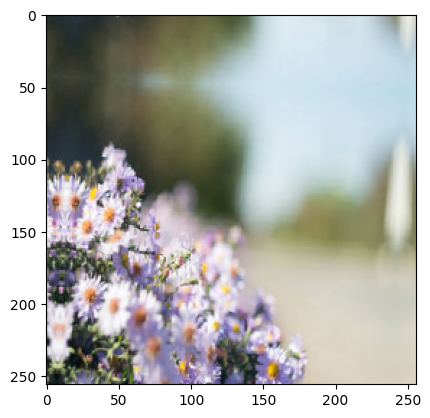

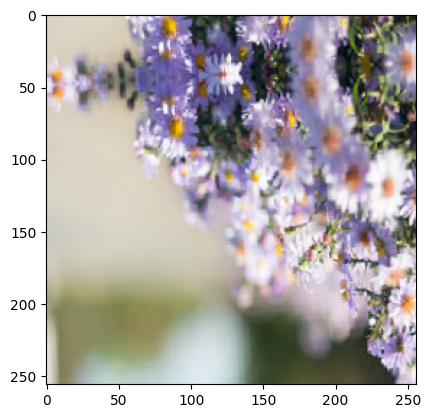

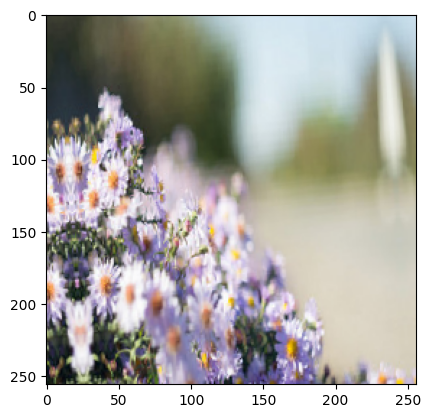

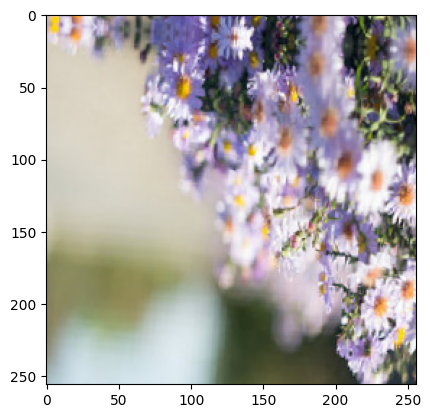

In [21]:
img_path = '/content/flowers/train/daisy/17357636476_1953c07aa4_n.jpg'
img = image.load_img(img_path, target_size=(image_size, image_size))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i = 0
for batch in train_datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 6 == 0:
        break
plt.show()

In [22]:
#Setting train generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(image_size, image_size),
    batch_size=batch_size,
    class_mode='categorical')
#Setting test generator without data augmentation
test_datagen = ImageDataGenerator(rescale=1. / 255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(image_size, image_size),
    batch_size=batch_size,
    class_mode='categorical')
#Print count classes
train_generator.class_indices

Found 2935 images belonging to 5 classes.
Found 725 images belonging to 5 classes.


{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

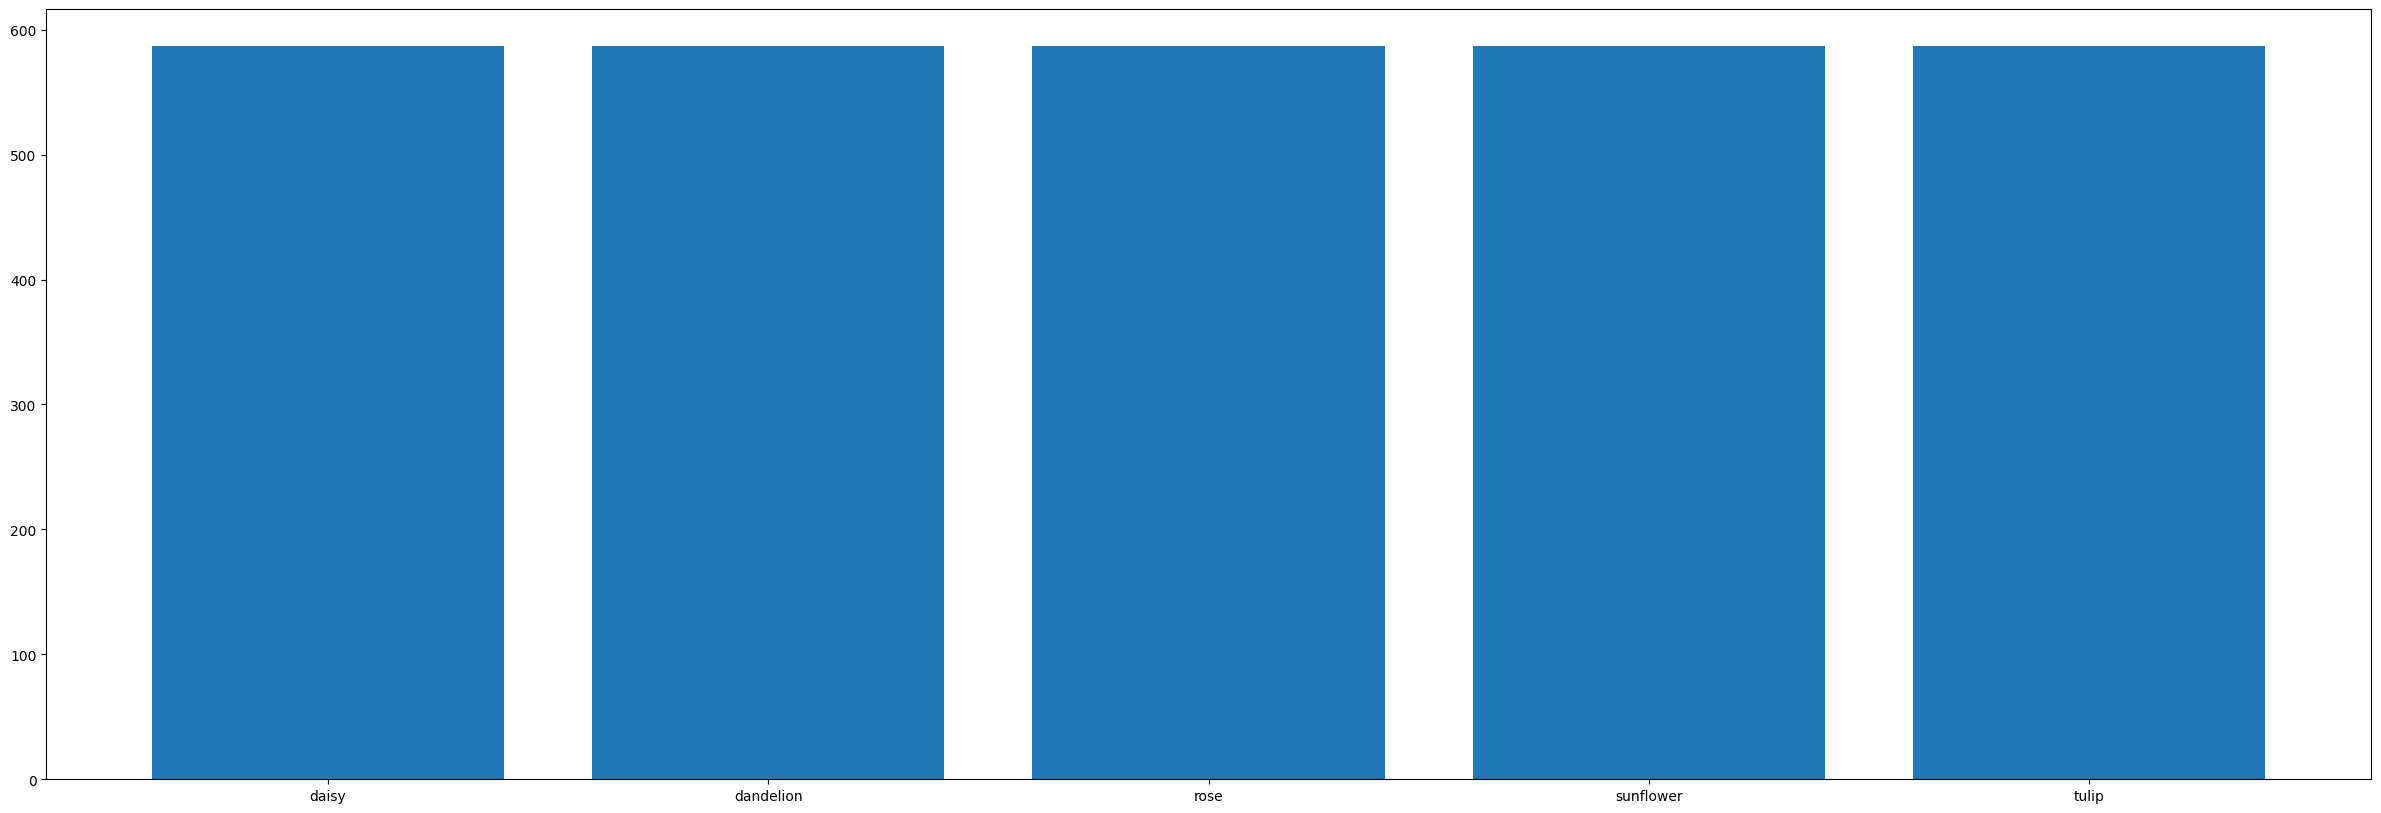

In [23]:
from sklearn.utils.class_weight import compute_class_weight
cls_train = train_generator.classes
from collections import OrderedDict
classes = list(train_generator.class_indices.keys())
num_values = []
unique, counts = np.unique(cls_train, return_counts=True)
valdict=OrderedDict(zip(unique, counts))
for i in range(5):
    num_values.append(valdict[i])
plt.figure(figsize=(30,10))
x = np.arange(len(num_values))
xlabel = classes
plt.bar(x, num_values)
plt.xticks(x, xlabel)
plt.show()

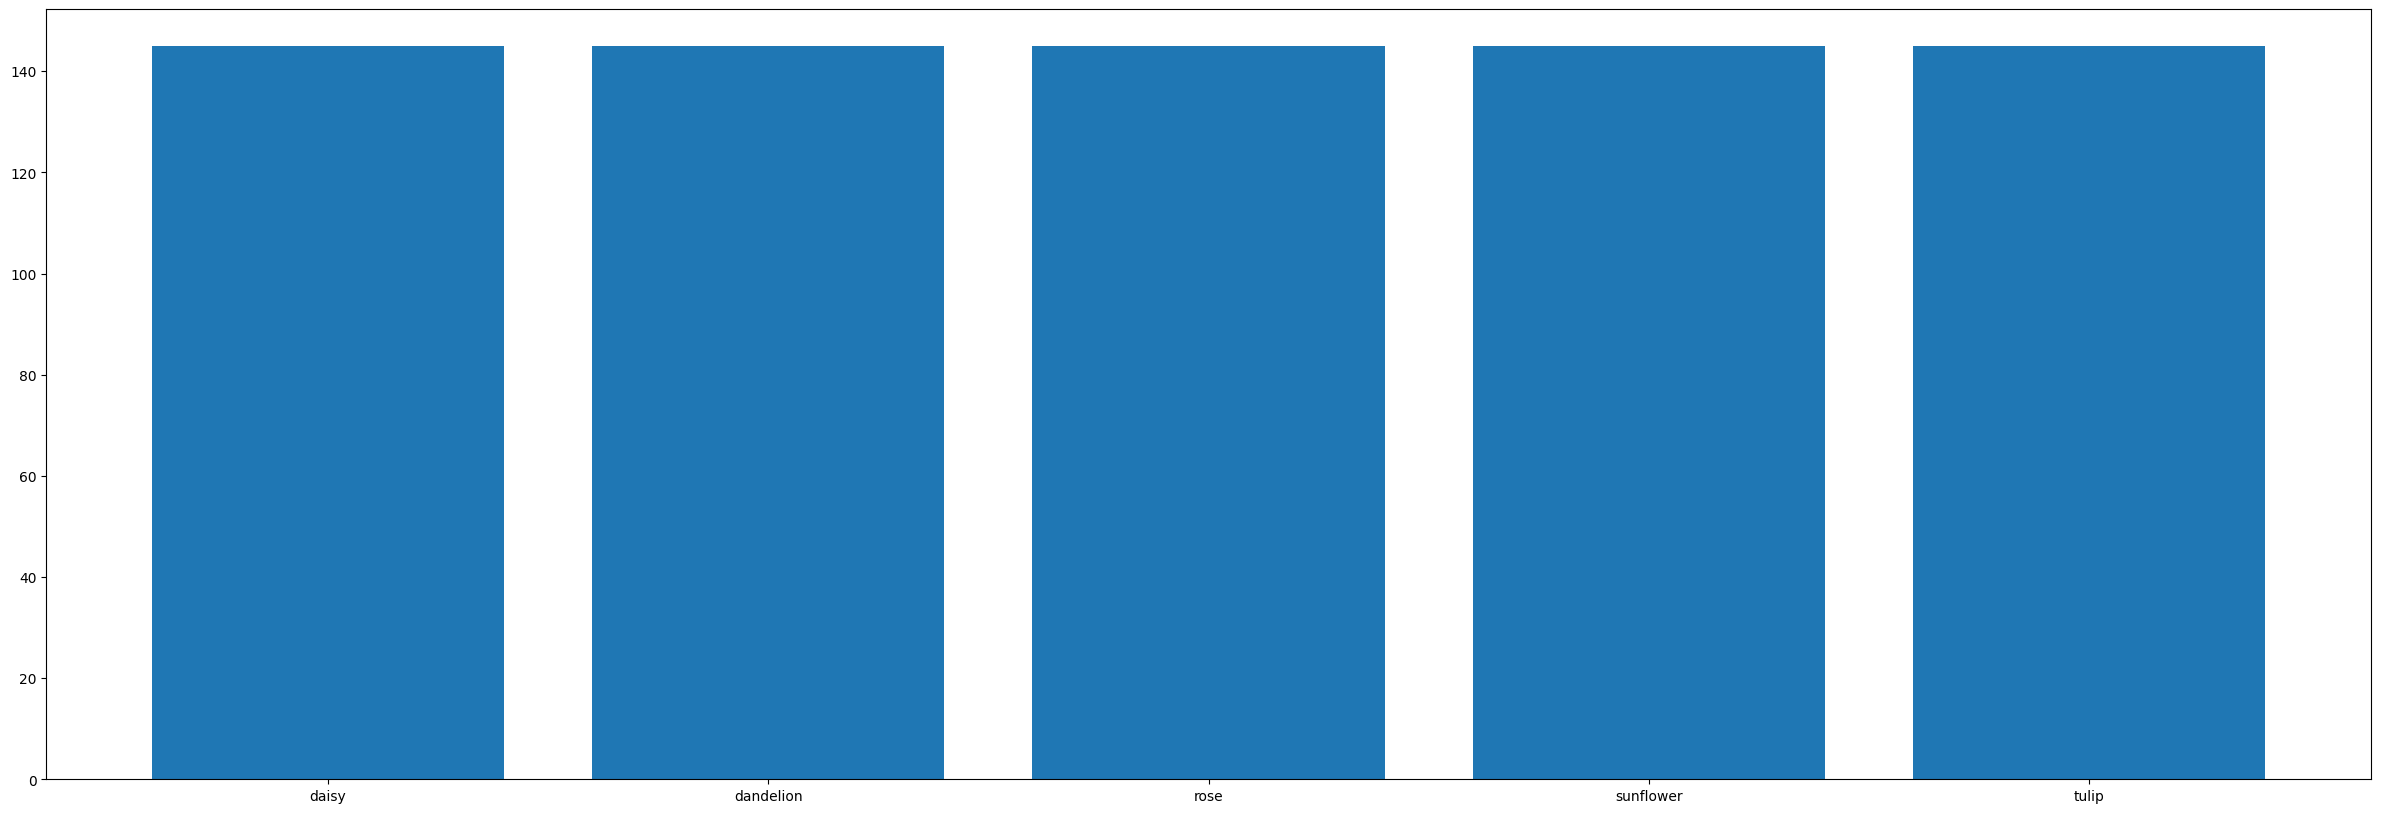

In [24]:
from sklearn.utils.class_weight import compute_class_weight
cls_test = test_generator.classes
from collections import OrderedDict
classes = list(test_generator.class_indices.keys())
num_values = []
unique, counts = np.unique(cls_test, return_counts=True)
valdict=OrderedDict(zip(unique, counts))
for i in range(5):
    num_values.append(valdict[i])
plt.figure(figsize=(30,10))
x = np.arange(len(num_values))
xlabel = classes
plt.bar(x, num_values)
plt.xticks(x, xlabel)
plt.show()

In [29]:
pretrained_model = InceptionV3(weights='imagenet', include_top=False)
pretrained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, None, None, 32)       864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, None, None, 32)       96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, None, None, 32)       0         ['batch_normalizati

In [30]:
pretrained_model.trainable = False
pretrained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, None, None, 32)       864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, None, None, 32)       96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, None, None, 32)       0         ['batch_normalizati

In [31]:
x = pretrained_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(5, activation='softmax')(x)
model = Model(inputs=pretrained_model.input, outputs=predictions)

In [32]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, None, None, 32)       864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, None, None, 32)       96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, None, None, 32)       0         ['batch_normalization[0][0

In [33]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

filepath="inceptionv3_best.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1,
                             save_best_only=True, mode='min')
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=10,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)
callbacks_list = [checkpoint, learning_rate_reduction]

steps_per_epoch = 40
history = model.fit_generator(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    validation_data=test_generator,
    validation_steps=5,
    callbacks=callbacks_list,
    epochs=40,
    verbose=2)

<ipython-input-33-f358ad30e359>:16: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/40

Epoch 1: val_loss improved from inf to 0.95560, saving model to inceptionv3_best.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


40/40 - 258s - loss: 1.0200 - accuracy: 0.6313 - val_loss: 0.9556 - val_accuracy: 0.6875 - lr: 0.0010 - 258s/epoch - 6s/step
Epoch 2/40

Epoch 2: val_loss improved from 0.95560 to 0.64036, saving model to inceptionv3_best.h5
40/40 - 245s - loss: 0.7836 - accuracy: 0.7309 - val_loss: 0.6404 - val_accuracy: 0.8250 - lr: 0.0010 - 245s/epoch - 6s/step
Epoch 3/40

Epoch 3: val_loss improved from 0.64036 to 0.52206, saving model to inceptionv3_best.h5
40/40 - 243s - loss: 0.6937 - accuracy: 0.7545 - val_loss: 0.5221 - val_accuracy: 0.8125 - lr: 0.0010 - 243s/epoch - 6s/step
Epoch 4/40

Epoch 4: val_loss improved from 0.52206 to 0.45792, saving model to inceptionv3_best.h5
40/40 - 228s - loss: 0.6366 - accuracy: 0.7563 - val_loss: 0.4579 - val_accuracy: 0.8188 - lr: 0.0010 - 228s/epoch - 6s/step
Epoch 5/40

Epoch 5: val_loss did not improve from 0.45792
40/40 - 242s - loss: 0.6007 - accuracy: 0.7828 - val_loss: 0.5088 - val_accuracy: 0.8250 - lr: 0.0010 - 242s/epoch - 6s/step
Epoch 6/40

Epoc

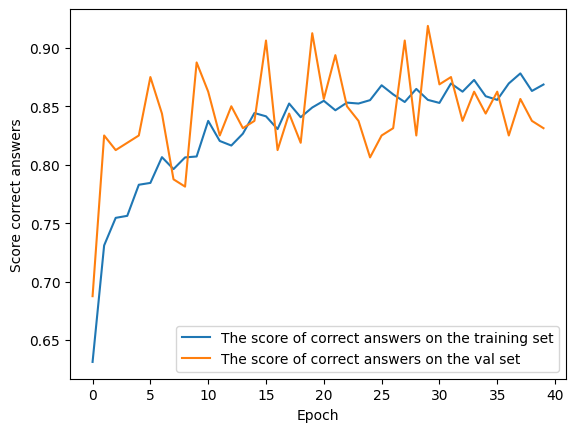

In [34]:
plt.plot(history.history['accuracy'], label='The score of correct answers on the training set')
plt.plot(history.history['val_accuracy'], label='The score of correct answers on the val set')
plt.xlabel('Epoch')
plt.ylabel('Score correct answers')
plt.legend()
plt.show()

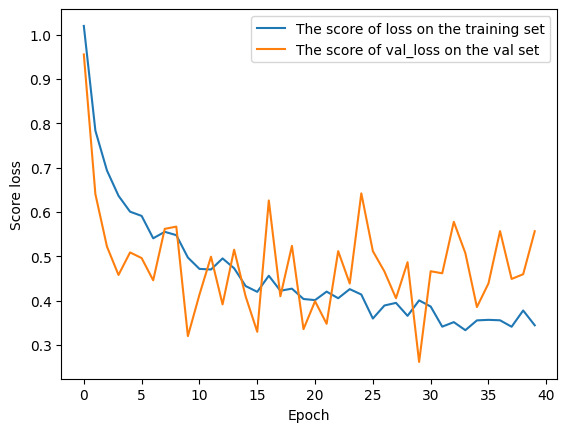

In [35]:
plt.plot(history.history['loss'], label='The score of loss on the training set')
plt.plot(history.history['val_loss'], label='The score of val_loss on the val set')
plt.xlabel('Epoch')
plt.ylabel('Score loss')
plt.legend()
plt.show()

In [36]:
model.load_weights("inceptionv3_best.h5")
pretrained_model.trainable = False
for layer in model.layers[:290]:
   layer.trainable = False
for layer in model.layers[290:]:
   layer.trainable = True

In [38]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
filepath="inceptionv3_fine_tuned.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint, learning_rate_reduction]
steps_per_epoch = 32
history = model.fit_generator(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    validation_data=test_generator,
    validation_steps=5,
    callbacks=callbacks_list,
    epochs=1,
    verbose=2)

<ipython-input-38-0b13aa7a0a2a>:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(



Epoch 1: val_loss improved from inf to 2.41438, saving model to inceptionv3_fine_tuned.h5
32/32 - 218s - loss: 0.6687 - accuracy: 0.7990 - val_loss: 2.4144 - val_accuracy: 0.6875 - lr: 0.0010 - 218s/epoch - 7s/step


In [40]:
model = tensorflow.keras.models.load_model('/content/inceptionv3_fine_tuned.h5')

In [72]:
!wget https://w.forfun.com/fetch/5d/5d9c3c61ca5f53ba937eba1f00398361.jpeg

--2023-11-23 11:23:24--  https://w.forfun.com/fetch/5d/5d9c3c61ca5f53ba937eba1f00398361.jpeg
Resolving w.forfun.com (w.forfun.com)... 51.161.13.162
Connecting to w.forfun.com (w.forfun.com)|51.161.13.162|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9955359 (9.5M) [image/jpeg]
Saving to: ‘5d9c3c61ca5f53ba937eba1f00398361.jpeg’

5d9c3c61ca5f53ba937 100%[===================>]   9.49M  37.9MB/s    in 0.3s    

2023-11-23 11:23:24 (37.9 MB/s) - ‘5d9c3c61ca5f53ba937eba1f00398361.jpeg’ saved [9955359/9955359]



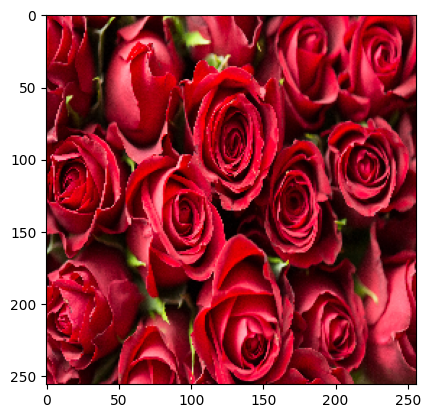

In [73]:
img_path = '/content/5d9c3c61ca5f53ba937eba1f00398361.jpeg'
img = image.load_img(img_path, target_size=(image_size, image_size))
plt.imshow(img)
plt.show()

In [74]:
x = image.img_to_array(img)
x /= 255
x = np.expand_dims(x, axis=0)

In [75]:
prediction = model.predict(x)

1/1 [==============================] - 0s 184ms/step


In [76]:
prediction

array([[7.0955462e-18, 1.5536052e-23, 1.0000000e+00, 5.2333917e-08,
        1.9816750e-12]], dtype=float32)

List classes with numbers of classes:

'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4

In [77]:
classes = np.argmax(prediction, axis = 1)
print(classes)

[2]
